In [1]:
#import libraries
import pandas as pd
import folium #to create maps rapidly with very little and easy to understand code.
import plotly.express as px #a high-level data visualization package that allows you to create interactive plots with very little code.
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
#read cv
df = pd.read_csv(r'C:\Users\HP\Downloads\Delhi-Metro-Network.csv')

In [3]:
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [4]:
#verify data for null
null_values = df.isnull().sum()

In [5]:
null_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [6]:
data_type = df.dtypes

In [7]:
data_type

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [8]:
#convert dates to datetime format
df['Opening Date'] = pd.to_datetime(df['Opening Date'])

In [9]:
#color schemes for metro lines
line_colors = {
    'Red line' : 'red',
    'Blue line' : 'blue',
    'Yellow line' : 'beige',
    'Green line' : 'green',
    'Voilet line' : 'purple',
    'Pink line' : 'pink',
    'Magenta line' : 'darkred',
    'Orange line' : 'orange',
    'Rapid Metro' : 'cadetblue',
    'Aqua line' : 'black',
    'Green line branch' : 'light green',
    'Blue line branch' : 'light blue',
    'Gray line' : 'lightgray'
}

In [10]:
map_with_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start = 11)

In [11]:
#add colored marker 
for index, row in df.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black') #default
    folium.Marker(
    location=[row['Latitude'], row['Longitude']],
    popup=f"{row['Station Name']}",
    tooltip=f"{row['Station Name']}, {line}",
    icon=folium.Icon(color=color)
    ).add_to(map_with_tooltip)

C:\Users\HP\AppData\Local\Temp\ipykernel_5676\3091689832.py:9: UserWarning: color argument of Icon should be one of: {'lightred', 'beige', 'green', 'lightgreen', 'blue', 'darkpurple', 'lightgray', 'darkgreen', 'white', 'darkblue', 'darkred', 'lightblue', 'red', 'purple', 'gray', 'pink', 'cadetblue', 'orange', 'black'}.
  icon=folium.Icon(color=color)


In [21]:
map_with_tooltip

In [43]:
df['Opening Year'] = df['Opening Date'].dt.year

# counting the number of stations opened each year
stations_per_year = df['Opening Year'].value_counts().sort_index()

stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

fig = px.bar(stations_per_year_df, x='Year', y='Number of Stations',
             title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'})

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
                  yaxis=dict(title='Number of Stations Opened'),
                  xaxis_title="Year")

fig.show()

In [15]:
stations_per_line = df['Line'].value_counts()

#calculate total dist. of each line(max dist. from start)
total_distance_per_line = df.groupby('Line')['Distance from Start (km)'].max()
avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line' : stations_per_line.index,
    'Number of Stations' : stations_per_line.values,
    'Average Distance Between Stations (km)' : avg_distance_per_line
})

#sorting dataframe by number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)


In [14]:
line_analysis

,Line,Number of Stations,Average Distance Between Stations (km)
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000
5,Magenta line,25,1.050000
6,Aqua line,21,1.379167
7,Green line,21,4.160000
8,Rapid Metro,11,1.421622
9,Blue line branch,8,1.000000


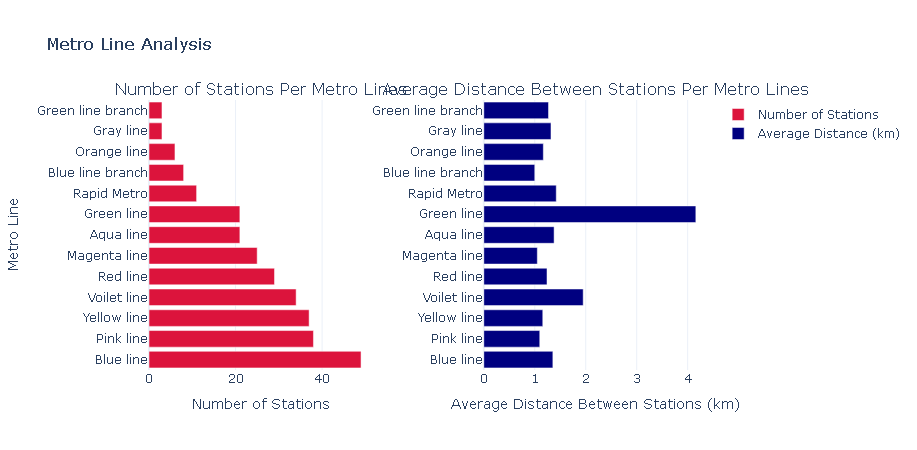

In [23]:
#create subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Number of Stations Per Metro Lines',
                                    'Average Distance Between Stations Per Metro Lines'),
                    horizontal_spacing = 0.2)

#plot Number of stations per metro lines
fig.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Number of Stations'],
           orientation='h', name='Number of Stations', marker_color='crimson'),
    row=1, col=1
)

#plot avg dist. between stations
fig.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Average Distance Between Stations (km)'],
           orientation='h', name='Average Distance (km)', marker_color='navy'),
    row=1, col=2
)

#update xaxis properties
fig.update_xaxes(title_text='Number of Stations', row=1, col=1)
fig.update_xaxes(title_text='Average Distance Between Stations (km)', row=1, col=2)

#update yaxis properties
fig.update_yaxes(title_text='Metro Line', row=1, col=1)
fig.update_yaxes(title_text='', row=1, col=2)

#update layout
fig.update_layout(height=450, width=900, title_text='Metro Line Analysis', template='plotly_white')

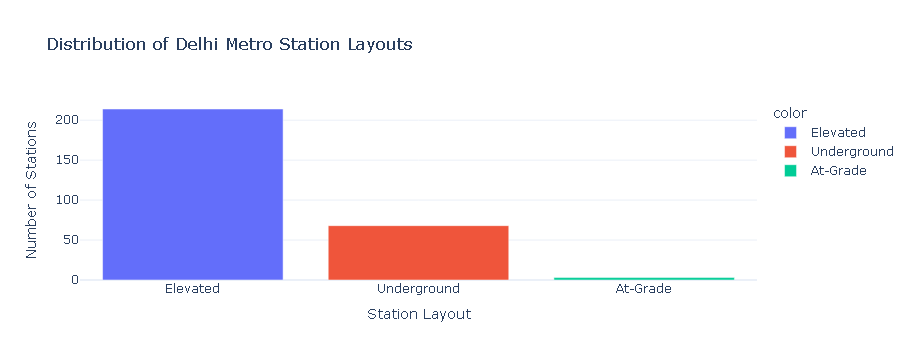

In [24]:
layout_counts = df['Station Layout'].value_counts()

#create bar
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x' : 'Station Layout', 'y' : 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

#update layout
fig.update_layout(xaxis_title='Station Layout',
                  yaxis_title='Number of Stations',
                  coloraxis_showscale=False,
                  template='plotly_white')